<a href="https://colab.research.google.com/github/Ps1231/Data-Science-Tutotial-Using-Python/blob/main/Data%20Preparation/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 : Data Preparation

In [23]:
# First, we need to open the required package, using the code discussed in the previous python tutorial notebook
import pandas as pd

# Next, import the data set under the name house_train by using the read_csv() command and specifying the file’s location.
house_train = pd.read_csv("/content/sample_data/california_housing_train.csv")

# As discussed , since the read_csv command is in the pandas package, we need to give the name of the package before the command.
# As we opened the pandas package as pd, the full command is pd.read_csv()

from google.colab import drive

drive.mount( '/content/drive')

bank_train = pd.read_csv('/content/drive/MyDrive/bank.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 How to Add an Index Field Using Python

### Find the number of records and columns in the data set.

In [8]:
# To create the index, we first need to find the number of records and columns in the data set.
house_train.shape

# Using .shape after the name of the data set will give us the number of rows and columns in the data set.
# The first number in the output is the number of records, 17000. The second is the number of variables.


(17000, 10)

### Now, create a new variable that assigns every record a unique integer.

In [9]:

# Once we know the number of records, we create a new variable that assigns every record a unique integer.

house_train['index'] = pd.Series(range(0,26874))
# The nested commands Series() and range() create a string of numbers whose lower bound is zero and upper bound is the number of records.
# Since the Series() command is contained in the pandas package,
# we renamed the pandas package pd, we preface the Series() command with pd and a period.
# The result is the code pd.Series().
# Note that the lower bound of the range() command is zero and not one, as Python begins counting locations at zero.
# We save the series of numbers as a new variable in the data set, index,
# by assigning the output of pd.Series(range()) to the index variable of the bank_train data set using house_train[‘index’].
# To view the data set with its new variable, we can look at the head of the data set.

house_train.head
# Using .head after the name of the data set will generate output containing the

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  ho

##  2.2 How to Change Misleading Field Values Using Python


### To replace misleading values

In [20]:
# We also need to import the numpy package for this section.
import numpy as np

# We need to identify all records with d'latitude' value of 33.6 and replace them with the Python code for missing numbers, NaN.
# Once the replacement is made, we will save the variable under the 'latitude' variable name, effectively overriding the previous variable’s values.

house_train['latitude'] = house_train['latitude'].replace({33.60000: np.NaN})

# The code house_train['latitude'] accesses the variable 'latitude'.
# The command replace({33.6: np.NaN }) finds each instance of 33.6 in the 'latitude' variable and replaces it with the value NaN.
# To save the newly edited variable under its original name,
# we set the right‐hand side equal to the original 'latitude' variable on the left by reusing the variable name house_train['latitude'].
house_train.head


<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57       NaN                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  ho

### To create a histogram of the variable

<Axes: title={'center': 'Histogram '}, ylabel='Frequency'>

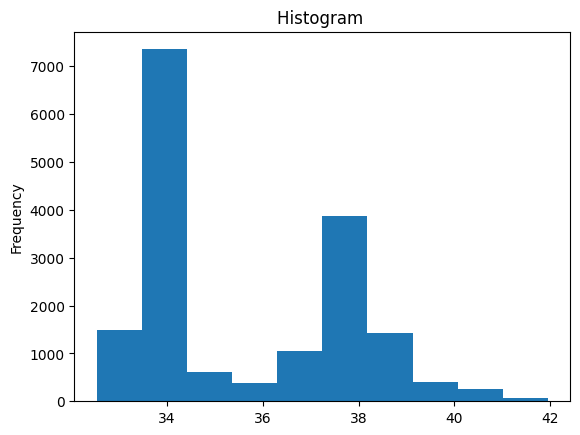

In [21]:
# To create a histogram of the variable, use the hist() command.
house_train['latitude'].plot(kind ='hist',title = 'Histogram ')

# Using .plot() after the variable name will make a plot of the variable. We use kind = ‘hist’ to specify that a histogram should be made.
# The title input, contained in single quotes, creates the title of the histogram.


## 2.3 How to Reexpress Categorical Field Values Using Python


In [33]:
# We will replicate the marital variable, and name it marital_numeric, in preparation for replacing its categorical values with numeric ones.
bank_train['marital_numeric'] = bank_train['marital']

# The right‐hand side of the equal sign specifies the marital variable, and the equal sign assigns those values to the left‐hand side.
# There is currently no variable named marital_numeric, so one will be created and given the values of the variable marital.

# We need to set up a dictionary specifically for converting the categorical values in the marital_numeric variable to numeric values.
# The dictionary iscontained in curly brackets, { }, to set up our dictionary, as follows:
dict_edu = {"marital_numeric": {"married": 2,"single": 1, "divorced": 3}}

# Inside the dictionary, we use “marital_numeric” to specify the variable
# which we want to recode, followed by a colon and another set of curly brackets.
# Within this second set of curly brackets, we specify the recoding in the following order:
# Variable’s original value :Variable’s new value
# Each specification is separated by a comma.
# Note that we use Python’s valuefor missing numeric values, NaN, where necessary.
# Finally, we tell Python to use the dictionary to replace the variable’s values.
bank_train.replace(dict_edu, inplace=True)
bank_train.head
# The command replace() will replace the values according to the rules in the dictionary dict_edu.

<bound method NDFrame.head of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaig

## 2.4 How to Standardise Numeric Fields Using Python


In [35]:
# Import the required package.
from scipy import stats

# We will standardize the age variable and save it as a new variable, age_z.
bank_train['age_z'] = stats.zscore(bank_train['age'])
bank_train.head
# The zscore function calculates the z‐value of the given variable,
# in this case age, written in the code as bank_train[‘age’].
# As the zscore() command is part of the stats package, we write the command as stats.zscore().
# We save it as a new variable in the data set, age_z.

<bound method NDFrame.head of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaig

## 2.5 How to Identify Outliers Using Python

In [40]:
# We will continue using the age_z variable that we created in the previous section.
# We will find outliers by using the query() function, which identifies rows that meet a particular condition.
# bank_train.query('age_z > 3 | age_z < ‐3')

# The condition we want all returned records to meet is given as ’age_z > 3 |age_z < ‐3’.
# In words, this condition requires each record to either have an age_z value greater than 3, or an age_z value less than −3.
# The “or” is specified by the character | between the two conditions.
# All records which meet the specified condition are returned.
# In our example,all the records that have age_z values greater than 3 or less than −3.
# We can use these records to create a new data set, which is made up only of these values.
bank_train_outliers = bank_train.query('age_z > 3 | age_z < -3')

# By giving the output of the query() command a name, we create a new data set of only outliers, which we have called bank_train_outliers.
# Let us sort the data set bank_train_outliers by its age_z variable.
bank_train_sort = bank_train.sort_values(['age_z'], ascending=False)

# The sort_values() command will sort the records in the data set based on a specified variable.
# The sort can be ascending or descending.
# Here We  want the largest age_z values at the top, so we sort in descending order by
# specifying ascending = False.
# We can save this sorted data set under its own name,say bank_train_sort.
# Finally, let us say we want to report the age and marital status of the  15  people who have the largest age_z values.
# This condition specifies both the number of rows to report (15) and the columns to report (the variables named age and marital).
bank_train_sort[['age', 'marital']].head(n=15)

# The double‐bracket notation given after the data set name lets us specify which columns to include.
# The head() command will give the top records,
# stopping after n records if n is given, or after five records if no n value is given.
# In our case, we specify n = 15.
# The results are the age and marital status of the people with the 15 largest age_z values.

,age,marital
1582,95,divorced
3756,93,married
3822,93,married
3098,92,married
2802,92,married
1243,90,divorced
3292,90,divorced
9430,89,married
10562,88,married
5521,88,married
